In [19]:
import os
import numpy as np
import keras

from convlstm_autoencoder import ConvLSTMAutoEncoder
from datagen import BatchGenerator

from sklearn.preprocessing import MinMaxScaler
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# model = ConvLSTMAutoEncoder(input_shape=(50, 48, 48, 3))

In [3]:
# Load pre-trained model

model = keras.models.load_model("./log/20191111 15:46:51/bestweights.hdf5")
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "ConvLSTMAutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 50, 48, 48, 64)    154624    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 48, 48, 64)    256       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 50, 24, 24, 64)    0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 50, 24, 24, 64)    295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 24, 24, 64)    256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 50, 12, 12, 64)    0   

### Build Video Encoder: (50, 48, 48, 3) -> (50, 12, 12, 3)

In [4]:
layer_name = 'conv3d_1'

encoder = keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1_input (InputL (None, 50, 48, 48, 3)     0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 50, 48, 48, 64)    154624    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 48, 48, 64)    256       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 50, 24, 24, 64)    0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 50, 24, 24, 64)    295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 24, 24, 64)    256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 50, 12, 12, 64)    0   

In [5]:
pprint( os.listdir("data/video/20bn-jester-v1/1/") )

['00037.jpg',
 '00009.jpg',
 '00008.jpg',
 '00032.jpg',
 '00011.jpg',
 '00016.jpg',
 '00021.jpg',
 '00003.jpg',
 '00031.jpg',
 '00028.jpg',
 '00030.jpg',
 '00013.jpg',
 '00010.jpg',
 '00004.jpg',
 '00017.jpg',
 '00025.jpg',
 '00035.jpg',
 '00005.jpg',
 '00036.jpg',
 '00006.jpg',
 '00023.jpg',
 '00012.jpg',
 '00015.jpg',
 '00001.jpg',
 '00014.jpg',
 '00024.jpg',
 '00007.jpg',
 '00020.jpg',
 '00019.jpg',
 '00029.jpg',
 '00018.jpg',
 '00034.jpg',
 '00022.jpg',
 '00027.jpg',
 '00026.jpg',
 '00033.jpg',
 '00002.jpg']


### Feed Sample video 

In [6]:
frame_id=1

bgen = BatchGenerator(video_path="./data/video/20bn-jester-v1",
                                            img_size=(48, 48), 
                                            batch_size=1, 
                                            use_padding=True)
                                            
video, label = bgen.__getitem__(frame_id)

In [7]:
video.shape

(1, 50, 48, 48, 3)

In [30]:
hidden_output = encoder.predict(video)

In [31]:
hidden_output.shape

(1, 50, 12, 12, 3)

In [32]:
hidden_output[0][0].shape

(12, 12, 3)

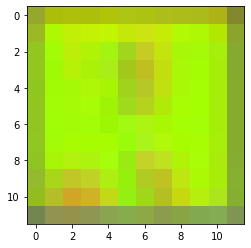

In [46]:
for i in range(50):
    img = hidden_output[0][i] * 255.
    img = (img - img.min()) / (img.max() - img.min())
    
    # plt.figure()
    plt.imshow(img)
    plt.savefig("id1_latent_img_"+str(i)+".jpg")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


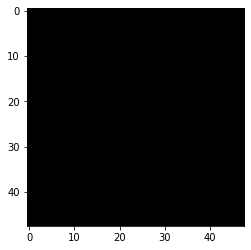

In [47]:
for i in range(50):
    img = video[0][i] * 255.
    img = (img - img.min()) / (img.max() - img.min())
    # plt.figure()
    plt.imshow(img)
    plt.savefig("id1_ori_img_"+str(i)+".jpg")

In [ ]:
from PIL import Image
import glob

files = sorted(glob.glob('./*.png'))
images = list(map(lambda file: Image.open(file), files))

images[0].save('out.gif', save_all=True, append_images=images[1:], duration=400, loop=0)

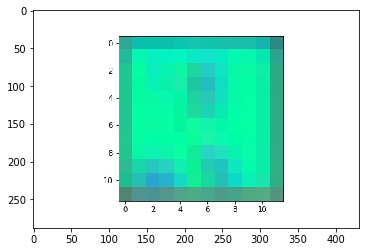

In [50]:
 import cv2

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter('video.mp4', fourcc, 20.0, (48, 48))

for i in range(50):
    img = cv2.imread('./demo/id1_latent_img_{}.jpg'.format(i))
    
    plt.imshow(img)
    
    # img = cv2.resize(img, (48,48))
    video.write(img)

video.release()